# Number 3

There are several cost functions available, but one which is in our interests and is also most widely used in regression and classification tasks is the MSE Cost Function. Your task is to find a polynomial regression model to establish an optimal relation between salary and position level by minimising the MSE cost function using a gradient descent approach. Please ensure the code is written in a Python notebook and put your relevant explanations/comments within the markdown cells. You may use a dataset taken from raw.githubusercontent.com/mkgurucharan/Regression/master/PositionSalaries_Data.csv

## Importing Libraries

These libraries below are used to work with polynomial regression models. In this case, I employed Artificial Neural Network regression to working with the minimizing the MSE cost function.

In [126]:
import pandas;
import numpy;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split;
from tensorflow.keras.layers import Dense, InputLayer;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.utils import plot_model;
from tensorflow.keras.optimizers import Adam;
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping;

## Data Loading & Exploration

This section is about data loading and explorations.  

In [127]:
dataframe = pandas.read_csv("PositionSalaries_Data.csv", index_col = None, );
dataframe.reset_index(drop=True, inplace=True);

# Randomize the data within dataframe
dataframe = dataframe.sample(frac = 1).reset_index(drop = True)

# Print some data
dataframe.head()

,Position,Level,Salary
0,Partner,7,200000
1,Region Manager,6,150000
2,C-level,9,500000
3,Senior Partner,8,300000
4,CEO,10,1000000


In [128]:
# Found that this data contains 10 rows and 3 columns. 
dataframe.shape

(10, 3)

## Data Pre-Processing

This section is about data pre-processing. The following actions are taken to clean and ease the training process:

1. Setting up Features and Label
Position and Level are used as features, while Salary for label

2. Drop Position column
Since level contains flag values for position, the "Position" column should be dropped.

3. Standardize the data with standard scaler
The question is asking me to control the MSE cost. Well, controlling MSE is hard since its barely readable especially when it comes to Gradient Descent. So the plan is to normalize the each data within feature and label, by lowering the standard deviation, in which turning the means within the data into 0.

4. Train-Test Split
Split the data into training and testing with ratio below:

| Split | Ratio |
|---|---|
| Train | 70% |
| Test | 30% |

In [129]:
# Call out Step 1

features = dataframe.drop(columns = ["Salary"]);
label = dataframe["Salary"];

label.shape

(10,)

In [130]:
# Call out Step 2

features = features.drop(columns = ["Position"]);
features.shape

(10, 1)

In [132]:
# Call out Step 3
scaler = StandardScaler();
features = scaler.fit_transform(features);
label = scaler.fit_transform(numpy.array(label).reshape(-1, 1));

features.shape

(10, 1)

In [133]:
feature_train, feature_test, label_train, label_test = train_test_split(
    features, 
    label, 
    train_size = 0.7, 
    test_size = 0.3, 
    random_state = 42
);

## Techniques

In endavour producing a high precision prediction polynomial regression model, the Artificial Neural Network (ANN) algorithm with Adam optimizer gradient descent method is employed. 
The Techniques section are consist of the following steps below:

1. ANN Model Factory
This part contains required meta data, and code design pattern to ease the training process of ANN model

2. Models fitting and evaluation
This part contains the training and evaluation process of the ANN model. Things to be known include:
- Mean Squared Error (MSE) is employed as model's loss (in this question wise, MSE treated as cost) function
- Mean Absolute Error (MAE) is employed as model's metrics function due to easier estimation and its readibility.

Both of MSE and MAE can be qualitatively said as:
"The more near zero both MSE and MAE, the more accurate the model prediction."

### Model Factory

Click [here to open LightGBM docs reference](https://lightgbm.readthedocs.io/en/latest/Parameters.html)

In [162]:
"""
ANNModel

This class implements a OO-pattern to ease model generation. 
"""
class ANNModel:

    def __init__(self):
        # The constructor only allowed to construct a standardized unchangeable configuration.
        model = Sequential();
        
        # Input Layer
        model.add(InputLayer(input_shape = (1,)));
        
        # Hidden Layer

        for i in [self.hidden_layer()]:
            for j in i:
                model.add(j);

        # Output Layer
        model.add(Dense(1, activation = "linear"));
    
        self.model = model;

    def hidden_layer(self):
        n = 1;
        return [
            Dense(32, activation = "relu"),
        ];

    # Early stopping after loss are not improved for some epochs
    def _callback_early_stopping(self):
        early_stopping_tolerance = 50;

        return EarlyStopping(
            monitor = "val_loss",
            patience = early_stopping_tolerance,
            restore_best_weights = True,
        );

    def fitting(self, train_feature, train_label, test_feature, test_label):
        
        model = self.model;

        plot_model(model, to_file = ("model_architecture.png"), show_shapes = True);

        model.compile(loss = "mse", optimizer = Adam(learning_rate = 1e-3), metrics = ["mae"]);

        # Fitting
        model_plot = model.fit(
            train_feature, 
            train_label, 
            epochs = int(1e+3), 
            validation_data = (test_feature, test_label), 
            verbose = 0,
            callbacks = [self._callback_early_stopping()] 
        );

        plt.plot(model_plot.history["loss"], label = "Model Training Loss (MSE)");
        plt.plot(model_plot.history["val_loss"], label = "Model Validation Loss (MSE)");

        plt.title("Training and Validation Loss");
        plt.xlabel("Epochs");
        plt.ylabel("Loss (MSE)");
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5));
        plt.show();

        epoch = len(model_plot.history["loss"]);
        print(f"Fixed Epoch: {epoch}");

        return model;

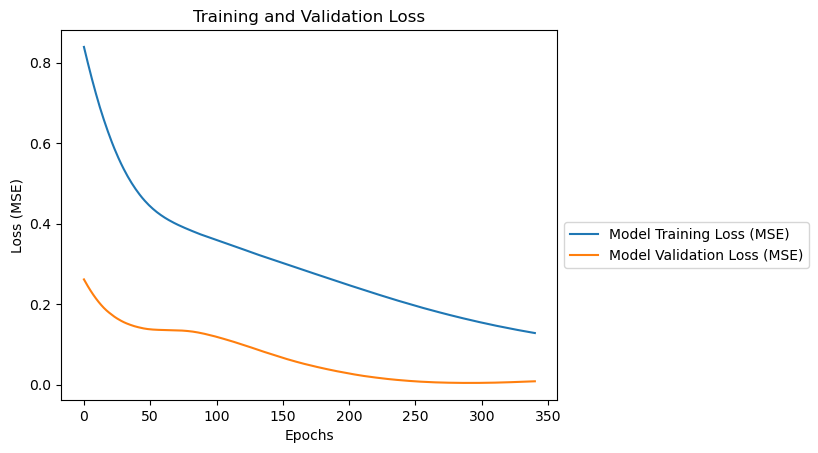

Fixed Epoch: 341
1/1 [==============================] - 0s 21ms/step - loss: 0.0041 - mae: 0.0512


In [163]:
model = ANNModel();
dojo = model.fitting(feature_train, label_train, feature_test, label_test);
loss, accuracy = dojo.evaluate(feature_test, label_test);